# Stock Market Analysis - Data Viz Project

In this portfolio project we will be looking at data from the stock market, particularly some technology stocks. We will use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method.

#### QUESTIONS

Always remember, all good data analysis projects begins with trying to answer questions. Therefore, we will be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks' closing prices?
    4.) What was the correlation between different stocks' daily returns?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior?

In [2]:
#import the standard libraries you will use for:

#data storage, orientation, and manipulation [i.e. standard numpy and pandas imports]
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

#standard plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#modifcation to seaborn background
sns.set_style('whitegrid')

#standard stats library
from scipy import stats

#command for showing plots in jupyter notebooks
%matplotlib inline

In [3]:
#imports for this specific project:

#for reading stock data from yahoo
from pandas_datareader import data
from pandas_datareader import DataReader

#for time stamps
from datetime import datetime

In [5]:
# For reading stock data from yahoo
# from pandas.io.data import DataReader
'''
BUT pandas.io does exist anymore, therefore, look at the below URL for solution


https://stackoverflow.com/questions/63212167/how-can-i-import-pandas-datareader
'''

'\nBUT pandas.io does exist anymore, therefore, look at the below URL for solution\n\n\nhttps://stackoverflow.com/questions/63212167/how-can-i-import-pandas-datareader\n'

In [ ]:
URL = 'https://stackoverflow.com/questions/47972667/importing-pandas-io-data'

#### Basic Analysis of Stock Information

This section will focus on how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

Using Yahoo in combiation with pandas to grab some tech stock information:

In [4]:
# make a list of tech stocks you want to look at:
tech_stock_list = ['AAPL','GOOG','MSFT','AMZN']

In [5]:
# set up the end and start time for the data you want to grab from yahoo
end_date = datetime.now()
start_date = datetime(end_date.year - 1, end_date.month, end_date.day)

In [ ]:
'''
# creating a FOR loop to get the stock data from yahoo and put it into a DataFrame:
for stock in tech_stock_list:
    globals()[stock] = DataReader(name = stock, data_source = 'yahoo', start = start_date, end = end_date)

ERROR - is throwing the error: TypeError: string indices must be integers, not 'str'

Upon researching, this looks to be an issue with DataReader and Yahoo's API. As of Jan 2023 they have yet to update this.

Therfore, a work around is outlined in the below URL:

https://365datascience.com/question/typeerror-string-indices-must-be-integers/
'''

In [ ]:
'''
WORK AROUND:

from pandas_datareader import data as pdr #import pandas datareader

import yfinance as yf # you will need to install it if haven't done it already

#override the data reader function

yf.pdr_override()

data = pdr.get_data_yahoo("TSLA", start="2022-12-01", end="2023-02-08") # I got results for TSLA but you can change whatever you like


'''

In [6]:
#importing data for analysis and vizualization:

import yfinance as yf

yf.pdr_override()

# creating a FOR loop to get the stock data from yahoo and put it into a DataFrame:
for stock in tech_stock_list:
    globals()[stock] = data.get_data_yahoo(stock, start = start_date, end = end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NOTE: Using globals() is a sloppy way of setting a DataFrame name, but it is simple.

In essense, it is a function that returns a dictionary of current global variables.

URL = "https://www.geeksforgeeks.org/python-globals-function/"

In [7]:
#view data to get a look at what columns and information we have to work with

#get the top 10 rows of data
AAPL.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-02,160.100006,162.410004,159.630005,160.009995,159.060196,59907000
2022-08-03,160.839996,166.589996,160.750000,166.130005,165.143890,82507500
2022-08-04,166.009995,167.190002,164.429993,165.809998,164.825790,55474100
2022-08-05,163.210007,165.850006,163.000000,165.350006,164.596848,56697000
2022-08-08,166.369995,167.809998,164.199997,164.869995,164.119019,60276900
2022-08-09,164.020004,165.820007,163.250000,164.919998,164.168793,63135500
2022-08-10,167.679993,169.339996,166.899994,169.240005,168.469131,70170500
2022-08-11,170.059998,170.990005,168.190002,168.490005,167.722534,57149200
2022-08-12,169.820007,172.169998,169.399994,172.100006,171.316101,68039400


In [40]:
#use .info() on df to get a sense of what information we might be missing in our dataset
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-08-01 to 2023-07-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


Looks like we have a full set of data.

Notes on Columns:

    1.) What Adj Close is => is the adjusted price of the stock that changed because of post-market close actions taken by the company.
        - Example: Dividend, Stock Split, etc.
        - URL = https://www.investopedia.com/ask/answers/06/adjustedclosingprice.asp

In [41]:
# Summary Stats of AAPL:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,158.573945,160.387849,157.022829,158.783824,158.426256,7.040936e+07
std,17.529764,17.328560,17.862373,17.611269,17.750261,2.320912e+07
min,126.010002,127.769997,124.169998,125.019997,124.656975,3.145820e+07
25%,145.815002,147.340004,144.014999,145.919998,145.470390,5.377905e+07
50%,154.789993,157.089996,153.369995,155.000000,154.602554,6.587450e+07
75%,171.034996,172.674995,170.470001,171.665001,171.424416,8.109905e+07
max,196.059998,198.229996,195.259995,196.449997,196.449997,1.647624e+08


<Axes: xlabel='Date'>

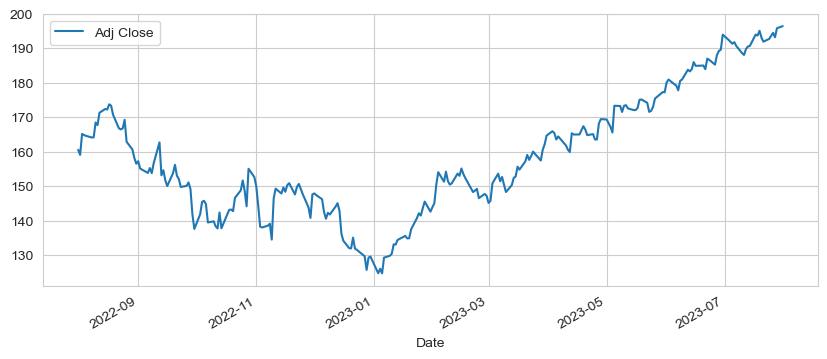

In [43]:
AAPL['Adj Close'].plot(legend = True, figsize = (10,4))

<Axes: xlabel='Date'>

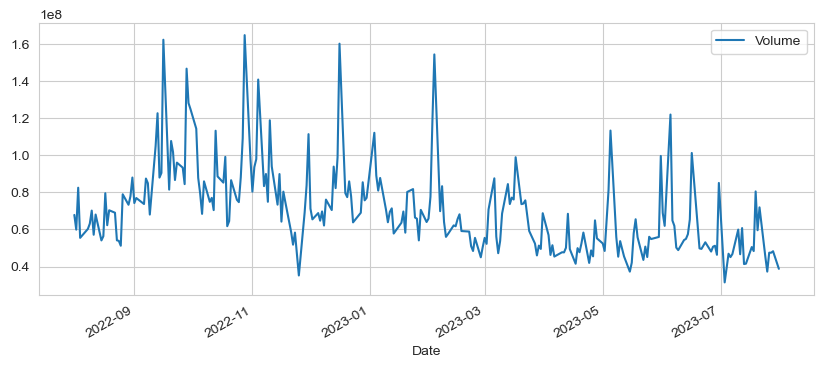

In [44]:
AAPL['Volume'].plot(legend = True, figsize = (10,4))

#### Looking at Moving Averages

What is a Moving Average => in essesnse, is a way to smooth a set of data to give a more clear picture for the trend of the data.

For more info on the moving average check out the following links:

1.) http://www.investopedia.com/terms/m/movingaverage.asp

2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [54]:
# pandas has a built-in rolling mean calculator

# make a list of several periods you would like to use as a moving averages
ma_day = [10,20,50]

# create a FOR loop that creates a rolling mean data point in a new column [in the df] that is named after the period used
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

<Axes: xlabel='Date'>

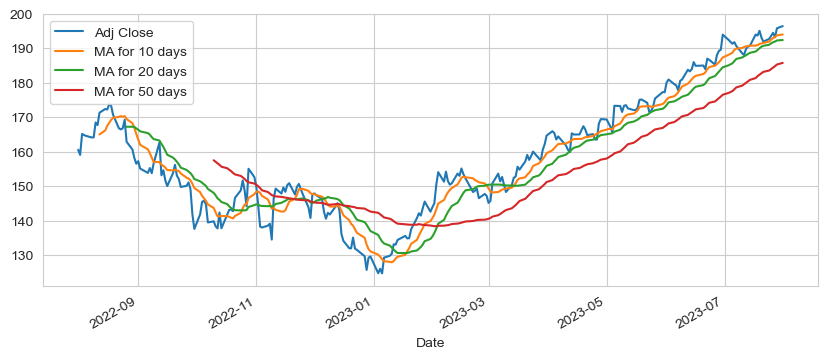

In [55]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

#### Section 2 - Daily Return Analysis

Now that there is some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the Apple stock.

<Axes: xlabel='Date'>

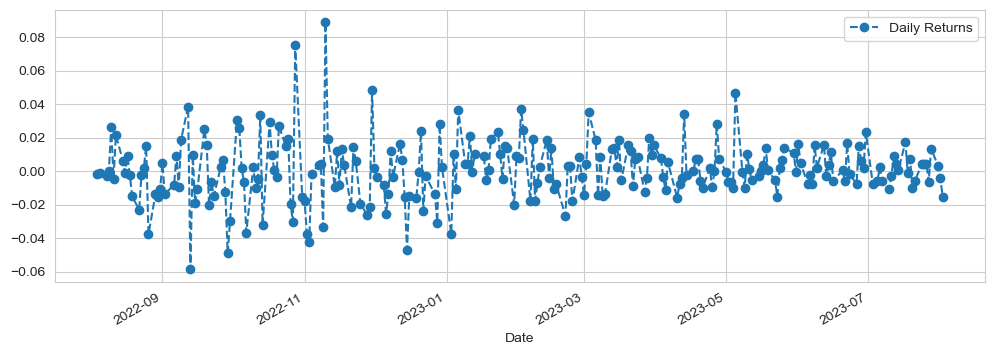

In [10]:
# Create a daily returns column for the AAPL df with the built-in pandas % change method:

# Creating 'Daily Returns' column
AAPL['Daily Returns'] = AAPL['Adj Close'].pct_change()

# Plot the daily returns via pandas built-in plotting
AAPL['Daily Returns'].plot(figsize = (12,4), legend = True, linestyle = '--', marker = 'o')

C:\Users\ggebu\AppData\Local\Temp\ipykernel_13496\647026168.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AAPL['Daily Returns'], bins = 100, color = 'purple')


<Axes: xlabel='Daily Returns', ylabel='Density'>

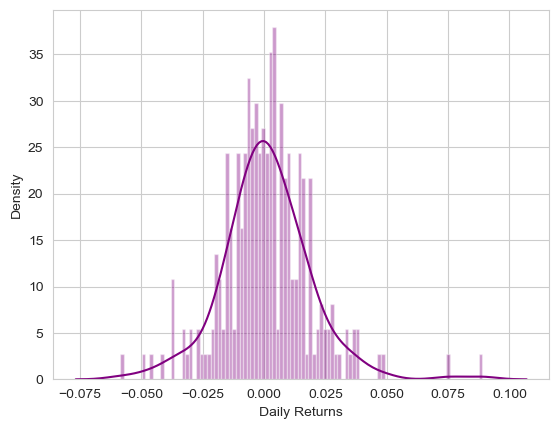

In [13]:
# Get the look of the overall average of daily returns using seaborn [histogram + kde plot]:

# Seaborn plotting
sns.distplot(AAPL['Daily Returns'], bins = 100, color = 'purple')

<Axes: >

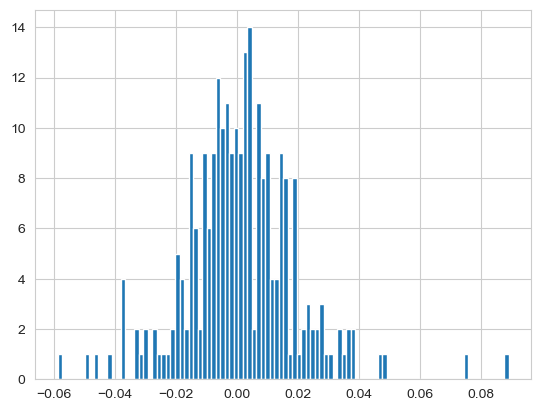

In [14]:
# Or can be completed through pandas built-in plotting
AAPL['Daily Returns'].hist(bins = 100)

The logical questions is what would you do if we wanted to analzye the returns of all the tech stocks in our list? Therefore, build a dataframe with all the adj closing columns from each stock.

In [7]:
# Use yahoo finance [yfinance] lib to pull 'Adj Close' data for all tech stocks into 1 dataframe:
df_adj_close = data.get_data_yahoo(tech_stock_list, start = start_date, end = end_date)['Adj Close']

[*********************100%***********************]  4 of 4 completed


NOTE - you could also merge all the closing data on the date from each dataframe.

In [18]:
# Show the head of the new df
df_adj_close.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-08-02,159.060211,134.160004,115.900002,272.188965
2022-08-03,165.143890,139.520004,118.779999,279.765747
2022-08-04,164.825790,142.570007,118.870003,280.934448
2022-08-05,164.596848,140.800003,118.220001,280.201508
2022-08-08,164.119019,139.410004,118.139999,277.636322


In [8]:
# Make a % change returns df of all the tech stocks
df_stock_returns = df_adj_close.pct_change()

In [20]:
df_stock_returns.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-08-02,NaN,NaN,NaN,NaN
2022-08-03,0.038248,0.039952,0.024849,0.027836
2022-08-04,-0.001926,0.021861,0.000758,0.004177
2022-08-05,-0.001389,-0.012415,-0.005468,-0.002609
2022-08-08,-0.002903,-0.009872,-0.000677,-0.009155


Now we can compare the returns of 2 stocks, to check their correlation. First compare GOOGL to itself to show what a perfectly correlated set of data looks like.

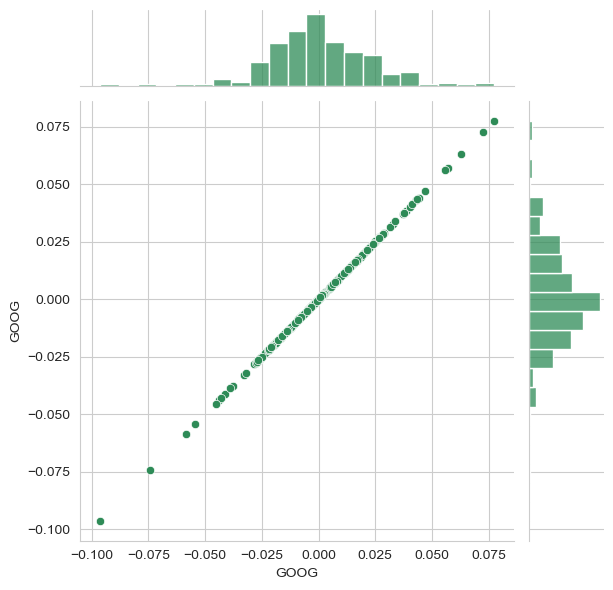

In [23]:
# Sns plotting to compare GOOGL returns:
sns.jointplot(data = df_stock_returns, x = 'GOOG', y = 'GOOG', kind = 'scatter', color = 'seagreen')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. So let's go ahead and compare Google and Microsoft the same way.

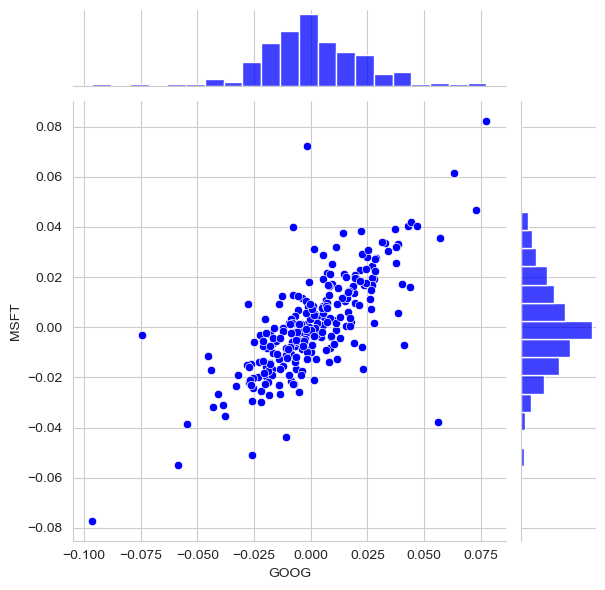

In [25]:
# Sns plotting to compare GOOGL and MSFT returns:
sns.jointplot(data = df_stock_returns, x = 'GOOG', y = 'MSFT', kind = 'scatter', color = 'blue')

Intersting, the pearsonr value (officially known as the Pearson product-moment correlation coefficient) can give you a sense of how correlated the daily percentage returns are. You can find more information about it at this link:

url - http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient

But for a quick intuitive sense, check out the picture below.

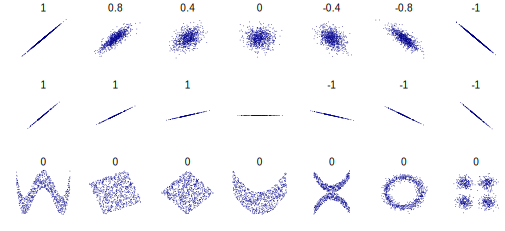

In [26]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

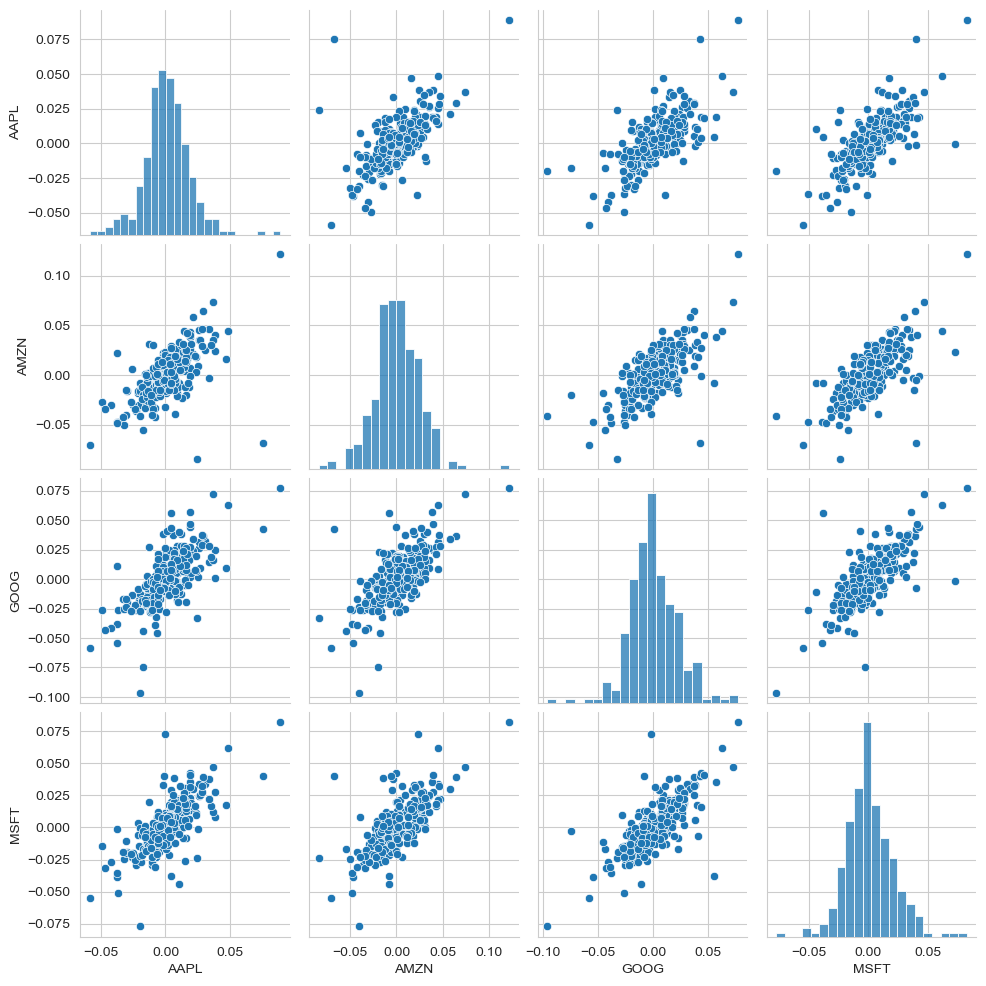

In [27]:
# Use SNS pairplot as a pre-fabbed comparison analysis viz:
sns.pairplot(df_stock_returns.dropna())

Above we can see all the relationships on daily returns between all the stocks. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

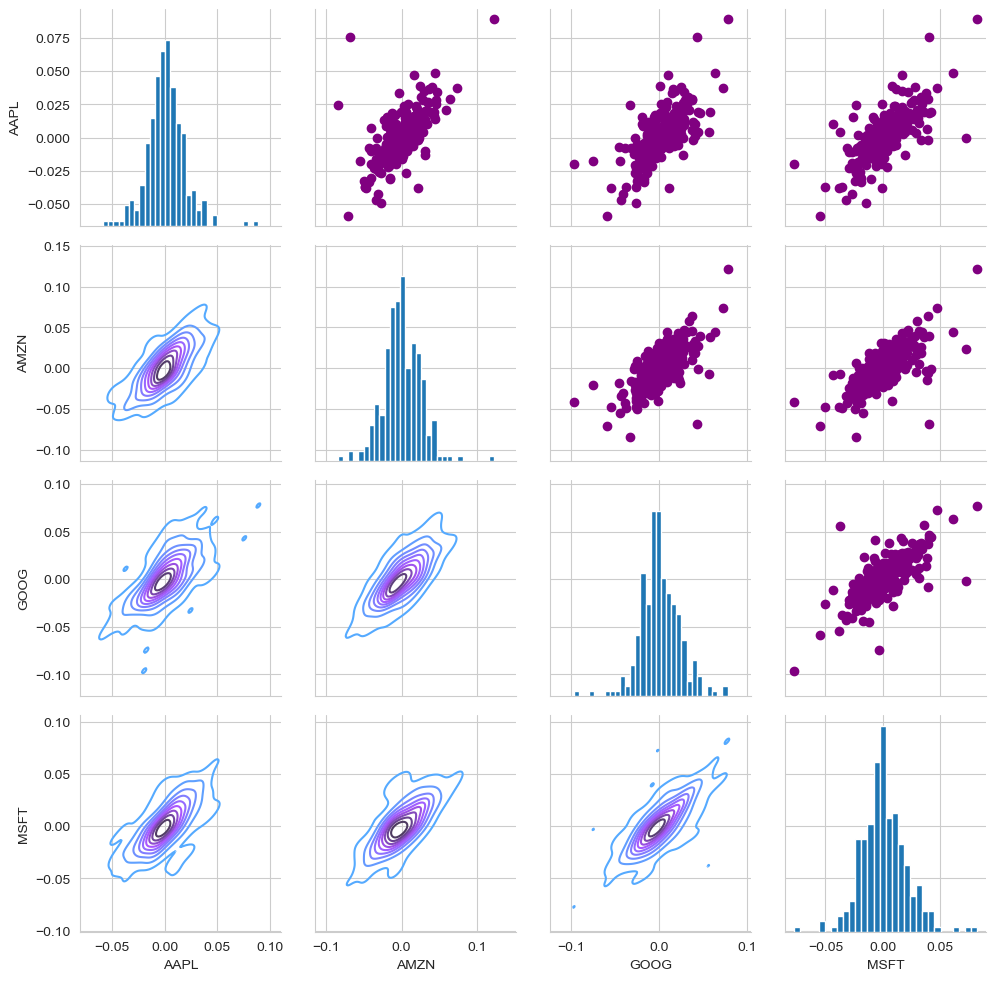

In [28]:
# Using SNS PairGrid to construct a comparison analysis viz with more control:

# Creating main figure object to work with
returned_fig = sns.PairGrid(data = df_stock_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returned_fig.map_upper(plt.scatter, color = 'purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returned_fig.map_lower(sns.kdeplot, cmap = 'cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returned_fig.map_diag(plt.hist, bins = 30)

We could have also analyzed the correlation of the closing prices using this exact same technique. Here it is shown, the code repeated from above with the exception of the DataFrame called.

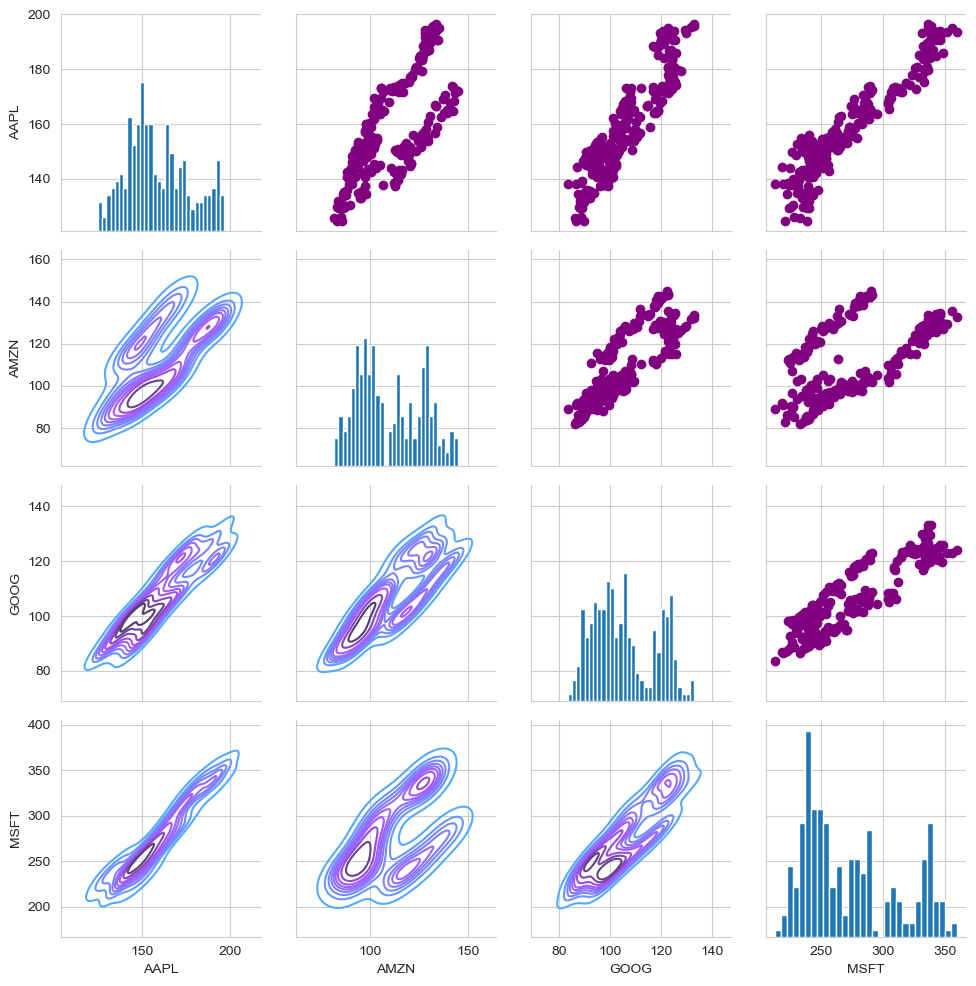

In [29]:
# Using SNS PairGrid to construct a comparison analysis viz with more control:

# Creating main figure object to work with, but with adj closing price
returned_fig = sns.PairGrid(data = df_adj_close.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returned_fig.map_upper(plt.scatter, color = 'purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returned_fig.map_lower(sns.kdeplot, cmap = 'cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returned_fig.map_diag(plt.hist, bins = 30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between all the tech stocks.

In [40]:
# Use SNS for a quick correlation plot for the daily returns
# sns.corrplot deprecated

          AAPL      AMZN      GOOG      MSFT
AAPL  1.000000  0.714705  0.910552  0.951445
AMZN  0.714705  1.000000  0.834779  0.589639
GOOG  0.910552  0.834779  1.000000  0.883030
MSFT  0.951445  0.589639  0.883030  1.000000


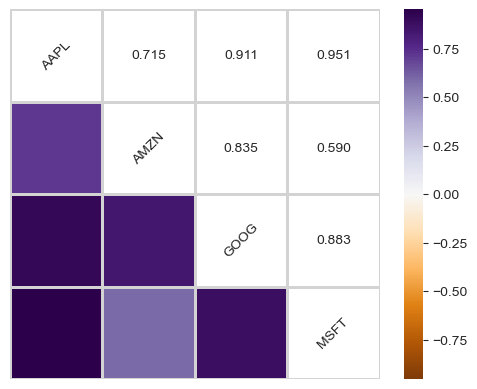

In [38]:
# Compute the correlation matrix
corr = df_adj_close.corr()
print(corr)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)
for i in range(len(corr)):
    ax.text(i+0.5,(i+0.5), corr.columns[i], 
            ha="center", va="center", rotation=45)
    for j in range(i+1, len(corr)):
        s = "{:.3f}".format(corr.values[i,j])
        ax.text(j+0.5,(i+0.5),s, 
            ha="center", va="center")
ax.axis("off")
plt.show()

It's also interesting, and makes sense, to see that all the technology comapnies are positively correlated.

#### Risk Analysis

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

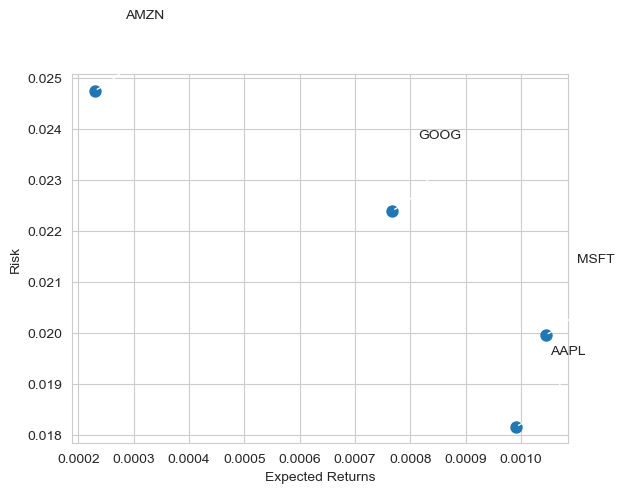

In [11]:
# Creating a Risk v. Expected Returns plot

# Creating a cleaned version of the stock returns df
df_stock_returns = df_stock_returns.dropna()

# Creating defined area for the circles of the scatter plot
area = np.pi*20

# Set the plot
plt.scatter(df_stock_returns.mean(), df_stock_returns.std(), s = area)

# Set the axis labels of the plot
plt.xlabel('Expected Returns')
plt.ylabel('Risk')

# Labelling the scatter plots, more information is through the documentation link below:
# http://matplotlib.org/users/annotations_guide.html
for label, x,y in zip(df_stock_returns.columns, df_stock_returns.mean(), df_stock_returns.std()):
    plt.annotate(
        label,
        xy = (x,y), xytext = (50,50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3, rad=-0.3'))
        

#### Value at Risk

Define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could  expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk.

#### Value at risk using the "bootstrap" method

For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Repeat the daily returns histogram for Apple stock.

C:\Users\ggebu\AppData\Local\Temp\ipykernel_8308\306910492.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AAPL['Daily Returns'].dropna(), bins = 100, color = 'purple')


<Axes: xlabel='Daily Returns', ylabel='Density'>

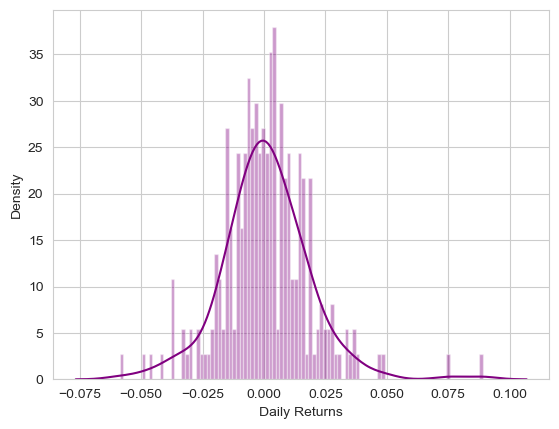

In [11]:
# Using SNS to plot histo + kde. Additionally, make sure to drop NaN values as SNS cannot read them
sns.distplot(AAPL['Daily Returns'].dropna(), bins = 100, color = 'purple')

Now use quantile to get the risk value for the stock.

In [12]:
# Get the 0.05 empirical quantile of daily returns [i.e. 95% confidence interval]
df_stock_returns['AAPL'].quantile(0.05)

-0.028527592064721087

The 0.05 empirical quantile of daily returns is at -0.0285. That means that with 95% confidence, our worst daily loss will not exceed 2.85%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.019 * 1,000,000 = $28,500.

Repeat this for the other stocks.

C:\Users\ggebu\AppData\Local\Temp\ipykernel_8308\775891744.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AMZN['Daily Returns'].dropna(), bins = 100, color = 'blue')


<Axes: xlabel='Daily Returns', ylabel='Density'>

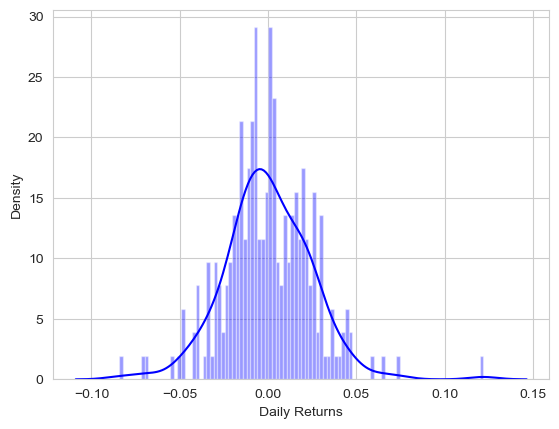

In [16]:
# Repeat for AMZN:

# Creating 'Daily Returns' column
AMZN['Daily Returns'] = AMZN['Adj Close'].pct_change()
sns.distplot(AMZN['Daily Returns'].dropna(), bins = 100, color = 'blue')

In [19]:
# Get the 0.05 empirical quantile of daily returns [i.e. 95% confidence interval]
df_stock_returns['AMZN'].quantile(0.05)

-0.03984805016138209

C:\Users\ggebu\AppData\Local\Temp\ipykernel_8308\1622593363.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(GOOG['Daily Returns'].dropna(), bins = 100, color = 'red')


<Axes: xlabel='Daily Returns', ylabel='Density'>

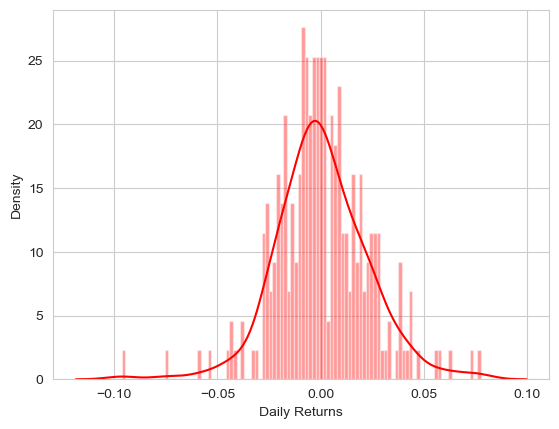

In [17]:
# Repeat for GOOG:

# Creating 'Daily Returns' column
GOOG['Daily Returns'] = GOOG['Adj Close'].pct_change()
sns.distplot(GOOG['Daily Returns'].dropna(), bins = 100, color = 'red')

In [20]:
# Get the 0.05 empirical quantile of daily returns [i.e. 95% confidence interval]
df_stock_returns['GOOG'].quantile(0.05)

-0.028054952042732412

C:\Users\ggebu\AppData\Local\Temp\ipykernel_8308\1823646869.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(MSFT['Daily Returns'].dropna(), bins = 100, color = 'green')


<Axes: xlabel='Daily Returns', ylabel='Density'>

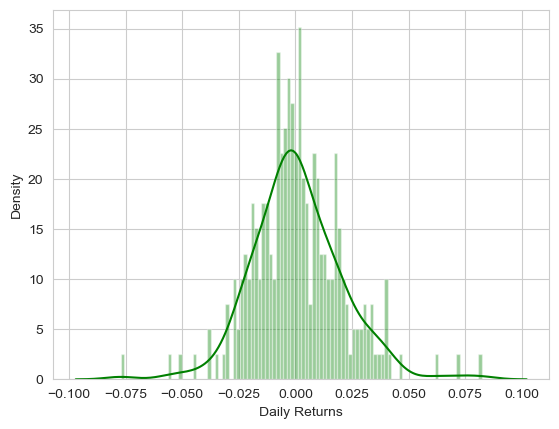

In [18]:
# Repeat for MSFT:

# Creating 'Daily Returns' column
MSFT['Daily Returns'] = MSFT['Adj Close'].pct_change()
sns.distplot(MSFT['Daily Returns'].dropna(), bins = 100, color = 'green')

In [21]:
# Get the 0.05 empirical quantile of daily returns [i.e. 95% confidence interval]
df_stock_returns['MSFT'].quantile(0.05)

-0.026602956914047397

#### Value at Risk Using the Monte Carlo Method

Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.


The equation for geometric Browninan motion is given by the following equation:

$$\frac{\Delta S}{S} = \mu\Delta t + \sigma \epsilon \sqrt{\Delta t}$$ 

Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

$$ \Delta S = S(\mu\Delta t + \sigma \epsilon \sqrt{\Delta t}) $$ 

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks, check out the following link:
http://www.investopedia.com/articles/07/montecarlo.asp


To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using the Google DataFrame GOOG

In [22]:
# Set up your Monte Carlo variables:

# Time horizon
days = 365

# Delta t
dt = 1/days

# Mu [drift] from the expected returns data
mu = df_stock_returns.mean()['GOOG']

# Volatility of the stock from the std() of the average return
sigma = df_stock_returns.std()['GOOG']

Next, create a function that takes in the starting price, number of days, sigma, and mu from previously calculated daily returns.

In [23]:
def stock_monte_carlo(start_price, days, mu, sigma):
    
    '''This function takes in starting stock price, days of simulation, mu, sigma, and returns a simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Define Stock and Drift arrays
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Create a FOR loop to run the price array for a number of days in simulation
    for x in range(1, days):
        
        # Calculate the Shock
        shock[x] = np.random.normal(loc= mu*dt, scale = sigma*np.sqrt(dt))
        
        # Calculate the Drift
        drift[x] = mu*dt
        
        # Calculate the Price
        price[x] = price[x-1] + (price[x-1]*(drift[x] + shock[x]))
        
    return price

In [24]:
# Get start price for GOOG
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Returns
Date,,,,,,,
2022-08-03,116.339996,119.419998,116.150002,118.779999,118.779999,25302800,NaN
2022-08-04,118.300003,119.500000,117.709999,118.870003,118.870003,15757700,0.000758
2022-08-05,116.930000,118.860001,116.709999,118.220001,118.220001,15615700,-0.005468
2022-08-08,119.120003,120.860001,117.830002,118.139999,118.139999,17061100,-0.000677
2022-08-09,117.989998,118.199997,116.559998,117.500000,117.500000,15424300,-0.005417


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

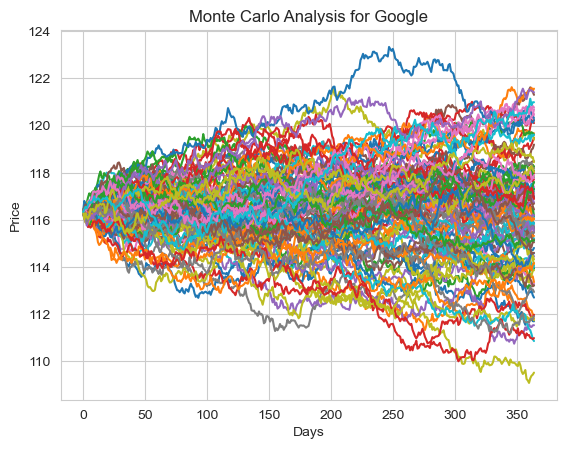

In [25]:
# Running the Monte Carlo Simulation:

# Set start price
start_price = 116.34

# Run 365 days simulation 100 times
for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))

# Creating plot labels
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

We want to get the histogram of this simulated data, so we can display the risk, and distribution of the simulation. But do a much larger sample.

In [26]:
# Run a larger simulation:

# Set the number of runs
runs = 10000

# Create an empty array to hold the end price data
end_price_of_each_simulation = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold = 5)

# Run simulation
for run in range(runs):
    # Set the simulation data point as the last stock price for that run
    end_price_of_each_simulation[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use qunatile to define our risk for this stock.

If you need more information on quantiles in the future, use the link below:
http://en.wikipedia.org/wiki/Quantile

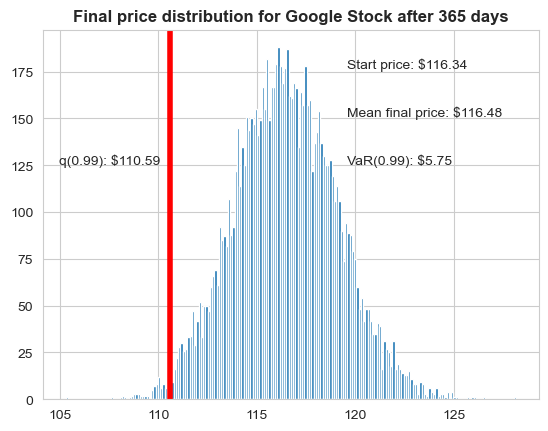

In [27]:
# Now define q as the 1% empirical qunatile [i.e. 99% of the values should fall between here]
q = np.percentile(end_price_of_each_simulation, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(end_price_of_each_simulation,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % end_price_of_each_simulation.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be $5.75 for every investment of 116.34 (the price of one inital google stock).

[i.e. for every initial stock you purchase your putting about $5.75 at risk 99% of the time from our Monte Carlo Simulation.]

In [28]:
# DATA PROJECT - STOCK MARKET ANALYSIS - COMPLETED